11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with SGD optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7346 - loss: 0.9029 - val_accuracy: 0.9392 - val_loss: 0.2172
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9275 - loss: 0.2473 - val_accuracy: 0.9567 - val_loss: 0.1623
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9486 - loss: 0.1773 - val_accuracy: 0.9682 - val_loss: 0.1271
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9586 - loss: 0.1435 - val_accuracy: 0.9680 - val_loss: 0.1217
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9664 - loss: 0.1152 - val_accuracy: 0.9705 - val_loss: 0.1003
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9709 - loss: 0.0964 - val_accuracy: 0.9740 - val_loss: 0.0913
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9764 - loss: 0.0833 - val_accuracy: 0.9743 - val_loss: 0.0915
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9791 - loss: 0.0728 - val_accuracy: 0.

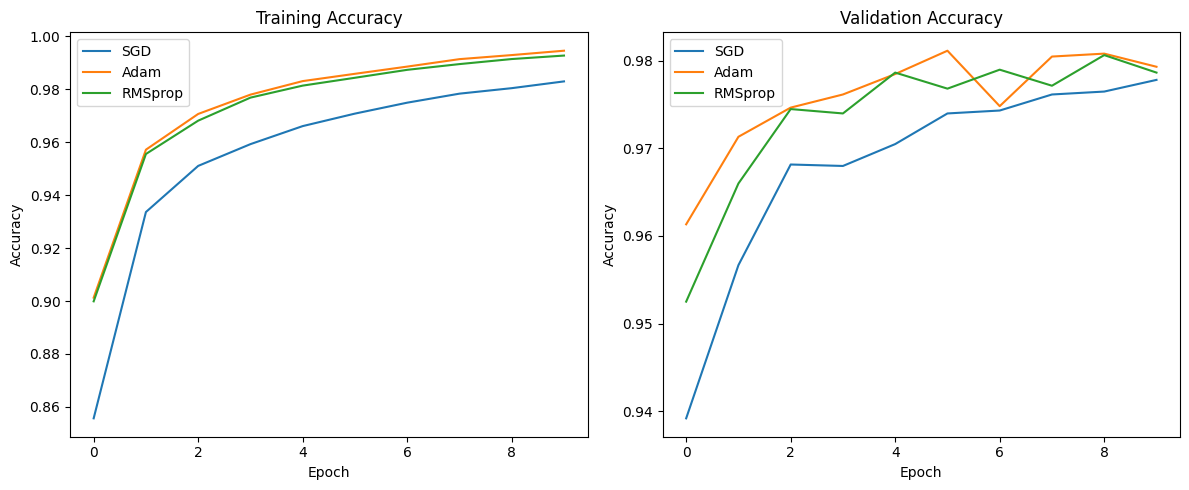


Final Results:
--------------------------------------------------
Optimizer  | Train Accuracy  | Validation Accuracy
--------------------------------------------------
SGD        | 0.9830          | 0.9778         
Adam       | 0.9946          | 0.9793         
RMSprop    | 0.9927          | 0.9787         
--------------------------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define function to create a feed-forward neural network
def create_ffnn():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# List of optimizers to compare
optimizers = {
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Adam': Adam(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.001)
}

# Training parameters
epochs = 10
batch_size = 128

# Train models with different optimizers and store results
history_dict = {}

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...")

    # Create model
    model = create_ffnn()

    # Compile model with current optimizer
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=1
    )

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Test Accuracy: {test_acc:.4f}")

    # Store history for plotting
    history_dict[name] = history.history

# Plot training and validation accuracy comparison
plt.figure(figsize=(12, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
for name, history in history_dict.items():
    plt.plot(history['accuracy'], label=f'{name}')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
for name, history in history_dict.items():
    plt.plot(history['val_accuracy'], label=f'{name}')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Compare final results
print("\nFinal Results:")
print("-" * 50)
print(f"{'Optimizer':<10} | {'Train Accuracy':<15} | {'Validation Accuracy':<15}")
print("-" * 50)
for name, history in history_dict.items():
    train_acc = history['accuracy'][-1]
    val_acc = history['val_accuracy'][-1]
    print(f"{name:<10} | {train_acc:.4f}{'':>9} | {val_acc:.4f}{'':>9}")
print("-" * 50)